In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv("hdata.csv")
data.head(5)#display 5 rows of data sets

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [13]:
data=pd.read_csv("hdata.csv")
data.head(5)#display 5 rows of data sets

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [14]:
dmap = {True: 1, False: 0} # labling true =1 and false =0

In [15]:
data['diabetes'] = data['diabetes'].map(dmap) # mpping true and false value i.e 1 and 0 to the dataframe "converting categoriacl label to integer label"
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [16]:
truevalue = len(data.loc[data['diabetes'] == True]) # calculating true value 
falsevalue = len(data.loc[data['diabetes'] == False]) # calculating false value
toatlvalue=truevalue+falsevalue # total value 
print("total value",+toatlvalue)
print("false value",+falsevalue)
print("true value",+truevalue) # for checkig the data set that is labels are in balance form or not 
value=[truevalue,falsevalue]

total value 768
false value 500
true value 268


In [17]:
print("total number of rows : {0}".format(len(data))) #we dont have any NAN value but we have 0 value in our data sets , so here we are calculating no of 0 values in each columns
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [18]:
data.columns # getting columns names

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [19]:
data.shape # getting shape of datasets

(768, 10)

In [20]:
data.info() #seeing the info of datasets or we can say that checking the format of  data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null int64
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [21]:
y=data["diabetes"] # dividing the output label 
y.shape # seeing the shape of output label

(768,)

In [22]:
x=data[["num_preg","glucose_conc","diastolic_bp","thickness","insulin","bmi","diab_pred","age","skin"]] #dividng the feature colunms
x.shape # seeing the shape of feature data frame 

(768, 9)

In [23]:
x.head(2) # two rows of feature dataframe

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426


In [24]:
y.head(2) # first two outputs of label coulmns

0    1
1    0
Name: diabetes, dtype: int64

In [25]:
unique_ele, unique_count = np.unique(y,return_counts=True) # checking balance or imbalance of output from function
print("Frequency of unique values of the said array:")
print(np.asarray((unique_ele, unique_count)))

Frequency of unique values of the said array:
[[  0   1]
 [500 268]]


In [27]:
from sklearn.model_selection import train_test_split # importing train test splting method

x_1, x_test, y_1, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # train =80 test =20
x_train, x_cv, y_train, y_cv = train_test_split(x_1,y_1,test_size= 0.2, random_state=42) #train = 80 % of 80 and crossvalidation=20% of 20

print("x_train shape: ",x_train.shape, "y_train shape: ",y_train.shape)#size of train ##for traing
print("x_cv shape: ",x_cv.shape, "y_cv shape: ",y_cv.shape)#size of crossvalidation ##fro better accuracy
print("x_test shape: ",x_test.shape, "y_test shape: ",y_test.shape)# size of test ##fro prediction

x_train shape:  (491, 9) y_train shape:  (491,)
x_cv shape:  (123, 9) y_cv shape:  (123,)
x_test shape:  (154, 9) y_test shape:  (154,)


In [28]:
from sklearn.preprocessing import StandardScaler# scaling our datasets 
sc = StandardScaler()

x_trainS = sc.fit_transform(x_train)
X_1S = sc.fit_transform(x_1)
x_cvS = sc.transform(x_cv)

x_testS = sc.transform(x_test)


In [30]:
from sklearn.linear_model import LogisticRegression # imporying logistic regression
from sklearn.metrics import accuracy_score # importing accuracy score
alpha = [10**x for x in range(-4,4,1)] # creating lamd value 
acc = [] #storing accuracy
for c in alpha: # running loop for different lambda value to check at which point accuracy is high
  clf = LogisticRegression(penalty='l2',tol=0.0001, C=c,max_iter=1000)
  clf.fit(x_trainS,y_train)
  y_pred = clf.predict(x_cvS)
  score = accuracy_score(y_pred,y_cv)
  acc.append(score) # appendingscore in list 
  print(score)

0.7479674796747967
0.7642276422764228
0.7560975609756098
0.7642276422764228
0.7723577235772358
0.7723577235772358
0.7723577235772358
0.7723577235772358


C:\Users\Padam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Padam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Padam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Padam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Padam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

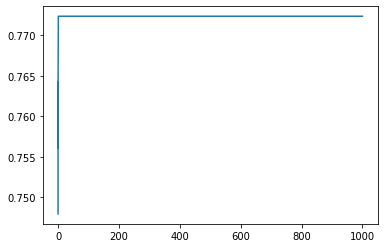

In [31]:
import matplotlib.pyplot as plt #ploting graph that discribe accuracy on differnt lamda values
plt.plot(alpha,acc)

In [32]:
optimalC = alpha[acc.index(max(acc))]# obtaing at which point accuracy is high
print(optimalC) # point 

1


In [33]:
clf = LogisticRegression(penalty='l2',tol=0.0001, C=optimalC,max_iter=1000) # again creating and fitting our model at lamda value =1 ie c=1
clf.fit(x_trainS,y_train)
y_pred = clf.predict(x_testS)
score = accuracy_score(y_pred,y_test)
print(score)

0.7272727272727273


C:\Users\Padam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
from sklearn.metrics import confusion_matrix #importingconfusion matrix for better perfromance
confusion_matrix(y_pred,y_test) # so here 76 and 36 points truely classified

array([[76, 19],
       [23, 36]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report #finfing precision , recall and f1 score=2*((precision*recall)/(precision+recall))
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        95
           1       0.65      0.61      0.63        59

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.72      0.73      0.73       154



In [36]:
sample_data = X_test[3]
print(type(sample_data))
point = np.reshape(sample_data,(1,9))
classLabel = clf.predict(point)
print(classLabel)

NameError: name 'X_testS' is not defined

In [37]:
clf.predict_proba(point)

NameError: name 'point' is not defined